In [18]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
import os
import sys
import pathlib
import itertools as it
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio

mod_path = os.path.abspath(os.path.join('..', '..', '..'))
if mod_path not in sys.path:
    sys.path.insert(0, mod_path)

from ex7.python.libs import *

In [3]:
mpl.rcParams['figure.dpi'] = 150

# K-means

## Fin closest centroids

In [4]:
data = sio.loadmat('../../data/ex7data2.mat');
X = data['X']

In [5]:
K = 3;
initial_centroids = np.array([
    [3, 3],
    [6, 2],
    [8, 5]
])

In [6]:
idx = find_closest_centroinds(X, initial_centroids)

In [7]:
print(f'''Closest centroids for the first 3 examples:
{idx[:3]}
(the closest centroids should be 0, 2, 1 respectively)
''')

Closest centroids for the first 3 examples:
[0. 2. 1.]
(the closest centroids should be 0, 2, 1 respectively)



## compute means

In [8]:
centroids = compute_centroids(X, idx, K)

In [10]:
print(f''' Centroids computed after initial finding of closest centroids:
{centroids}

(the centroids should be)
[2.428301 3.157924]
[5.813503 2.633656]
[7.119387 3.616684]
''')

 Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

(the centroids should be)
[2.428301 3.157924]
[5.813503 2.633656]
[7.119387 3.616684]



## K-means clustering

In [13]:
data = sio.loadmat('../../data/ex7data2.mat')
X = data['X']

In [14]:
K = 3
max_iters = 10
initial_centroids = np.array([
    [3, 3],
    [6, 2],
    [8, 5]
])

In [101]:
centroids, idx = run_kmeans(X, initial_centroids, max_iters)

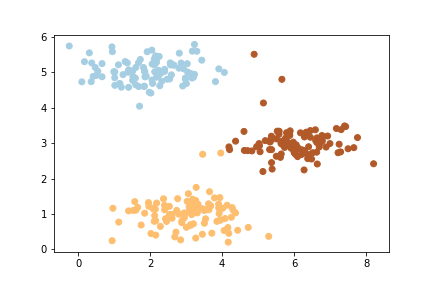

In [22]:
ax = plot_data_poits(X, idx, K)

# K-means on pixels

In [35]:
A = mpl.image.imread('../../data/bird_small.png')
img_size = X.shape

In [36]:
X = A.reshape(img_size[0] * img_size[1], 3)

In [37]:
K = 16
max_iters = 20

In [86]:
initial_centroids = kmean_init_centroids(X, K)
centroids, idx = run_kmeans(X, initial_centroids, max_iters)

In [87]:
idx = find_closest_centroinds(X, centroids)

In [89]:
X_recovered = np.empty((X.shape[0], 3))
for i in range(idx.size):
    X_recovered[i] = centroids[int(idx[i])]
X_recovered = X_recovered.reshape(img_size[0], img_size[1], 3)

Text(0.5, 1.0, 'Compressed, with 16 colors.')

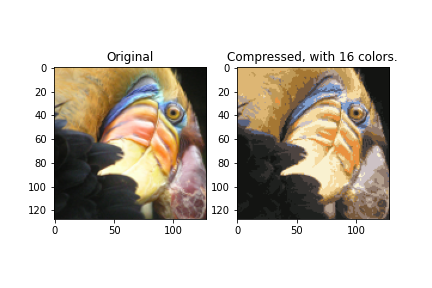

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A);
ax1.set_title('Original')

ax2.imshow(X_recovered)
ax2.set_title(f'Compressed, with {K} colors.')